# Data Visualization

This notebook includes:  
1) A visualization of Anscombe's Quartet  
2) The first 10 Bernstein polynomials  
3) 3 visualizations comparing height, age, and weight of MLB players  
4) Earthquake data from 2000-2010  
5) A graph of the pathologic Rosenbrock function  
6) Visualizations comparing different metrics of 10 different countries  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special
from matplotlib.colors import LogNorm
import scipy as sp
%matplotlib inline

## 1) Anscombe's Quartet

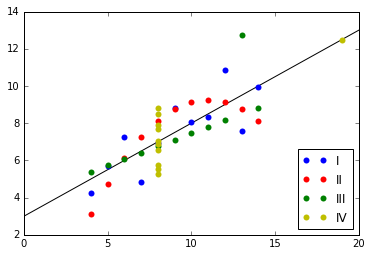

In [2]:
#Get all our data
ansc=np.load("Data/anscombe.npy")
first=ansc[:,0:2]
second=ansc[:,2:4]
third=ansc[:,4:6]
fourth=ansc[:,6:8]
x=np.linspace(0,20,100)

#Plot y=(x/2)+3
f=lambda x: x/2+3
plt.plot(x,f(x),"k")

#Plot I
plt.plot(first[:,0],first[:,1],"o",label="I",fillstyle="full", mew=0.0)
#Plot II
plt.plot(second[:,0],second[:,1],"ro",label="II", fillstyle="full", mew=0.0)
#Plot III
plt.plot(third[:,0],third[:,1],"go", label="III", fillstyle="full", mew=0.0)
#Plot IV
plt.plot(fourth[:,0],fourth[:,1],"yo", label="IV", fillstyle="full", mew=0.0)

#Show the plot
plt.legend(loc="lower right")
plt.show()

Each of the scatter plots are centered at the line y=(1/2x)+3,and it is easy to see that they have all the same numerical descriptions of a data set (mean, variance, correlation, etc)but they do not express the same types of data. Some of them (for example, data set III) have some points with very little variance and some points with a lot of variance. Other data sets, such as set II, have pretty uniform variance between each point. Also, set IV has a distant outlier that goes unnoticed by numerical means.

## 2) First 10 Bernstein Polynomials

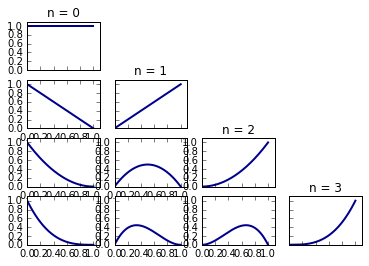

In [3]:
#Define variables
B = lambda x: sp.special.binom(n,v)*(x**v)*((1-x)**(n-v))
x = np.linspace(-1, 1, 200)

#Plot Bernstein polynomials
for n in range(4):
    for v in xrange(n+1):
        plt.subplot(4, 4, (1+4*n)+v) 
        plt.plot(x, B(x), c='darkblue', lw=2)
        plt.axis([0.0, 1.1, 0.0, 1.1])
    
    # Turn off extra tick marks and axis labels.
    plt.tick_params(which="both", top="off", right="off")
    if n < 6: # Remove x-axis label on upper plots.
        plt.tick_params(labelbottom="off")
    if n % 2: # Remove y-axis label on right plots.
        plt.tick_params(labelleft="off")
    plt.title("n = "+str(n))

#Show
plt.show()

## 3) MLB Data

In [4]:
#Define variables
mlb=np.load("Data/MLB.npy")
height=mlb[:,0]
weight=mlb[:,1]
age=mlb[:,2]

#Line of best fit function
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b


### Age to Weight

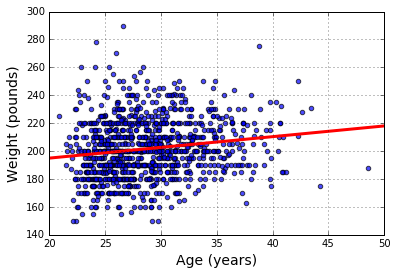

In [5]:
#Graph
plt.scatter(age, weight, alpha=.7)
plt.grid()

#Labels
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Weight (pounds)", fontsize=14)
plt.axis([20, 50, 140, 300])

#Best fit
b,m=best_fit(age,weight)
domain=np.linspace(20,50,len(height))
plt.plot(domain,m*domain+b,"r", lw=3)

In the MLB, age has a slight positive correlation with weight.

### Age to Height

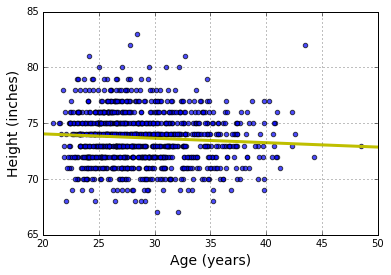

In [6]:
#Graph
plt.scatter(age, height, alpha=.7)
plt.grid()

#Labels
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Height (inches)", fontsize=14)
plt.axis([20, 50, 65, 85])

#Best fit
b,m=best_fit(age,height)
domain=np.linspace(20,50,len(height))
plt.plot(domain,m*domain+b,"y", lw=3)

Correlation between age and height is trivial.

### Height to Weight

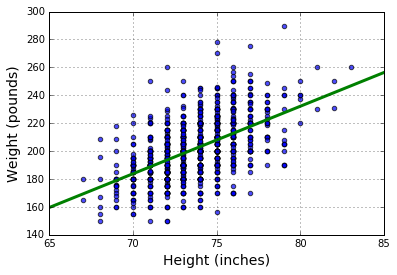

In [7]:
#Graph
plt.scatter(height, weight, alpha=.7)
plt.grid()

#Labels
plt.xlabel("Height (inches)", fontsize=14)
plt.ylabel("Weight (pounds)", fontsize=14)
plt.axis([65, 85, 140, 300])

#Best fit
b,m=best_fit(height,weight)
domain=np.linspace(65,85,len(height))
plt.plot(domain,m*domain+b,"g", lw=3)

Height is, obviously, positively related to weight.

## 4) Earthquake Data (2000-2010)

In [8]:
#Get variables
date, magnitude, longitude, latitude=np.load("Data/earthquakes.npy").T

### Earthquakes per Year

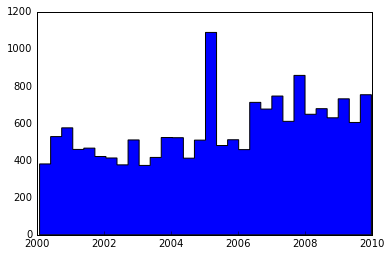

In [9]:
plt.hist(date, bins=30, histtype="stepfilled")
plt.tick_params(left="off", top="off", right="off")

### Magnitudes of Earthquakes (logarithmic)

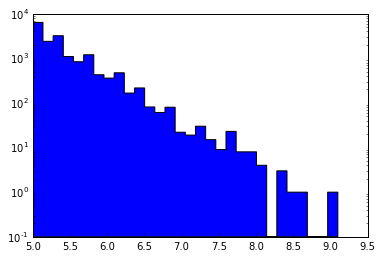

In [10]:
plt.hist(magnitude, bins=30, histtype="stepfilled", log=True)
plt.tick_params(left="off", top="off", right="off")

### Geographic Location

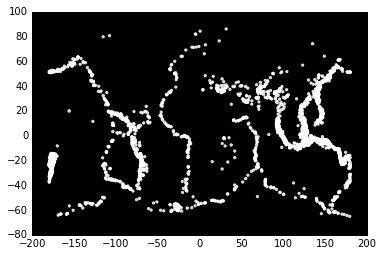

In [11]:
fig=plt.figure()
ax=fig.add_subplot(111, axisbg="black")
ax.scatter(longitude[::5], latitude[::5], color="white", s=magnitude, alpha=.8)
fig.canvas.draw()

## 5) Rosenbrock Function

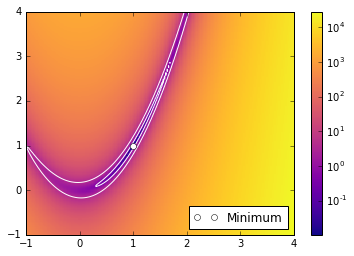

In [12]:
#Define variables
x=np.linspace(-1,4,200)
X, Y = np.meshgrid(x, x.copy())
Z = (1-X)**2 + 100*(Y-X**2)**2

plt.contour(X, Y, Z, [.5, 4], colors="white", lw=.5)
plt.pcolormesh(X, Y, Z, cmap="plasma", norm=LogNorm())
plt.colorbar()

#Min point
minx=[1]
miny=[1]
plt.plot(minx, miny, "ow", label="Minimum")
plt.legend(loc="lower right")

## 6) Country Data

In [13]:
#Get data
from matplotlib.colors import LogNorm

population, GDP, male_height, female_height=np.load("Data/countries.npy").T
countries = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]

### Population to GDP

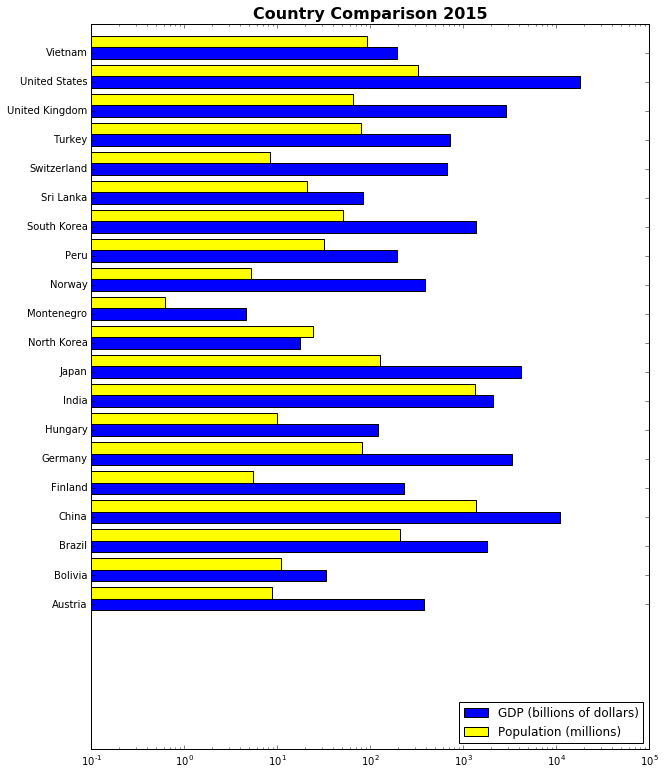

In [14]:
#Format correctly
positions=np.arange(len(countries))
width = 0.4
fig, ax = plt.subplots(figsize=(10,13))
#GDP.sort()
#population.sort()

#Plot
ax.barh(positions - width/2, GDP, width, color='blue', label='GDP (billions of dollars)', log=True)
ax.barh(positions + width/2, population, width, color='yellow', label='Population (millions)', log=True)
plt.yticks(positions, countries)


#Formatting
plt.title("Country Comparison 2015", fontsize=16, weight="bold")
plt.legend(loc="lower right")

### Male/Female Height Ratio by Country

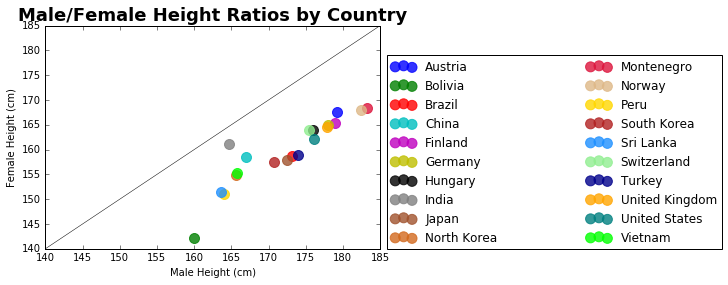

In [15]:
#Get colors
c=["b","g","r","c","m",'y','k','grey','sienna','chocolate','crimson','burlywood',
  'gold','firebrick','dodgerblue','lightgreen','darkblue','orange','teal','lime']

#plots
for i in xrange(len(male_height)):
    plt.scatter(male_height[i], female_height[i], 
                color= c[i], label=countries[i], 
                s=100, alpha=.8)
x=np.linspace(140,190,100)
plt.plot(x,x,"k",lw=0.5)

#Legend, Axes, Title
plt.title("Male/Female Height Ratios by Country", fontsize=18, weight="bold")
plt.axis([140,185,140,185],"equal")
plt.xlabel("Male Height (cm)")
plt.ylabel("Female Height (cm)")
plt.legend(bbox_to_anchor=(1.02, 0., 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

### How Height affects GDP

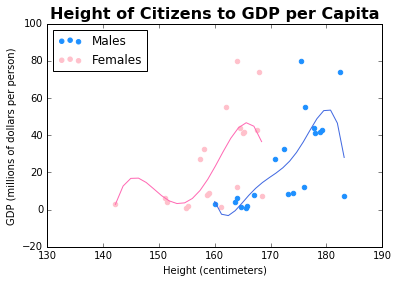

In [16]:
import numpy.polynomial.polynomial as poly

m=plt.scatter(male_height,GDP/population, color="dodgerblue", norm=LogNorm(), label="Males")
f=plt.scatter(female_height,GDP/population,color="pink", norm=LogNorm(), label="Females")

#Polynomials of best fit
xw=np.linspace(min(female_height),max(female_height),len(female_height))
xm=np.linspace(min(male_height),max(male_height),len(male_height))
womancoeffs = poly.polyfit(female_height, GDP/population, 4)
mancoeffs = poly.polyfit(male_height, GDP/population, 5)
ffitw = poly.polyval(xw, womancoeffs)
ffitm = poly.polyval(xm, mancoeffs)
plt.plot(xw, ffitw, color="hotpink")
plt.plot(xm, ffitm, color="royalblue")


#Legend, Show
plt.title("Height of Citizens to GDP per Capita", fontsize=16, weight="bold")
plt.legend(loc="upper left")
plt.xlabel("Height (centimeters)")
plt.ylabel("GDP (millions of dollars per person)")
plt.show()

This graph is interesting. Obviously, we will need more data, but if GDP as a function of height is a bell curve, then we might conjecture that heterogeneity of population would lead to  
1) a most average height of citizens as a whole, and  
2) the widest breadth of knowledge in the country.

### Countries to GDP per Capita

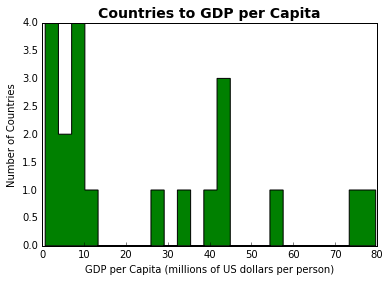

In [17]:
#Plot
plt.hist(GDP/population, bins=25, histtype="stepfilled", color="green")
plt.tick_params(left="off", top="off", right="off")

#Titles
plt.title("Countries to GDP per Capita", fontsize=14, weight="bold")
plt.xlabel("GDP per Capita (millions of US dollars per person)")
plt.ylabel("Number of Countries")